# 평당 가격에 대해 통계적 분석

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("Data/tmp.csv")
print(df)

      Unnamed: 0  dealDate  deposit  monthlyRent  ChangeRate  calcedRent  \
0              0  20110105   1500.0         60.0     7.20000   69.000000   
1              1  20110105  18000.0          0.0     7.20000  108.000000   
2              2  20110110  22000.0          0.0     7.20000  132.000000   
3              3  20110110   7000.0        100.0     7.20000  142.000000   
4              4  20110120  28000.0          0.0     7.20000  168.000000   
...          ...       ...      ...          ...         ...         ...   
1075        1075  20191220  56000.0          0.0     3.71594  173.410533   
1076        1076  20191224  43000.0          0.0     3.71594  133.154517   
1077        1077  20191225  32500.0          0.0     3.71594  100.640042   
1078        1078  20191230  50000.0          0.0     3.71594  154.830833   
1079        1079  20191230  90000.0          0.0     3.71594  278.695500   

      excluUseAr   RPA        aptNm  buildYear contractTerm contractType  \
0         6

In [13]:
mean_rpa = df['RPA'].mean()
std_rpa = df['RPA'].std()

print(f"Mean of RPA: {mean_rpa}")
print(f"Standard Deviation of RPA: {std_rpa}")

Mean of RPA: 1.5722407407407408
Standard Deviation of RPA: 0.7214429068522735


# 그려보기

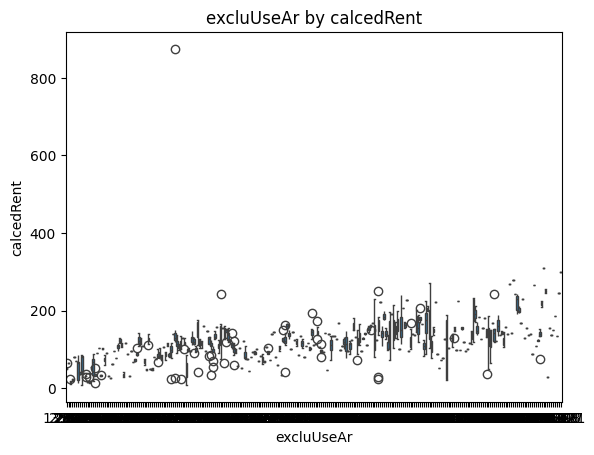

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

X = "excluUseAr"
Y = "calcedRent"
sns.boxplot(x=X, y=Y, data=df)
plt.title(f'{X} by {Y}')
plt.show()


# 다중회귀분석

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 독립 변수와 종속 변수 정의
X = df[['buildYear', 'excluUseAr', 'floor', 'dealDate']]  # 독립 변수들
y = df['calcedRent']  # 종속 변수

# 상수항 추가
X = sm.add_constant(X)

# 다중 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model.summary())

# 예측값과 잔차 추가
df['Predicted_RPA'] = model.predict(X)
df['Residuals'] = df['RPA'] - df['Predicted_RPA']

# 결과 확인
print(df[['buildYear', 'deposit', 'monthlyRent', 'excluUseAr', 'RPA', 'Predicted_RPA', 'Residuals']])


                            OLS Regression Results                            
Dep. Variable:             calcedRent   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     287.1
Date:                Tue, 07 Jan 2025   Prob (F-statistic):          6.17e-168
Time:                        00:35:58   Log-Likelihood:                -5523.2
No. Observations:                1080   AIC:                         1.106e+04
Df Residuals:                    1075   BIC:                         1.108e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7247.1808    995.427     -7.280      0.0